In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 

## Untidy data

In [2]:
df = pd.read_csv('london-borough-profiles.csv', encoding= 'unicode_escape');

df.head().append(df.tail())

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228,Lab,0,100,0,36.5
2,E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
3,E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0,39.6
4,E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3
33,E13000001,Inner London,NaN,3535700,1522541,"31,929",110.7,34.7,38.5,54.7,...,7.2,3.4,-,5.3,.,.,23.4,69.7,3.8,37.7
34,E13000002,Outer London,NaN,5299800,2079422,"125,424",42.3,36.9,13.8,71.7,...,7.3,3.2,-,6.5,.,.,39.2,49.4,7.8,39.6
35,E12000007,London,NaN,8835500,3601963,"157,215",56.2,36.0,13.9,73.6,...,7.2,3.3,23.2,6.0,169,.,33.1,57.3,6.3,38.9
36,E92000001,England,NaN,55609600,.,"13,025,967",.,40.0,19.0,63.3,...,7.3,3.0,19.8,6.2,183,.,.,.,.,.
37,K02000001,United Kingdom,NaN,65999100,.,.,.,40.1,18.8,63.3,...,7.3,3.0,-,NaN,.,.,.,.,.,.


## Pie Chart

#### Pie Chart showing the largest migrant population that arrived to the UK in 2015/2016

In [3]:
#loading the dataset
dfdemo = pd.read_csv('london-borough-profiles.csv', 
                    encoding= 'unicode_escape',
                    usecols=[1,2,7,15,25],
                    skiprows=[0,34,35,36,37,38],
                    names = ['Area_Name','Inner/Outer_London','Average_age','Largest_migrant_population_by_country_of_birth','Largest_migrant_population_arrived']);
dfdemo = dfdemo.fillna('')

dfdemo.head(8).append(dfdemo.tail(8))

,Area_Name,Inner/Outer_London,Average_age,Largest_migrant_population_by_country_of_birth,Largest_migrant_population_arrived
0,City of London,Inner London,43.2,United States,India
1,Barking and Dagenham,Outer London,32.9,Nigeria,Romania
2,Barnet,Outer London,37.3,India,Romania
3,Bexley,Outer London,39.0,Nigeria,Romania
4,Brent,Outer London,35.6,India,Romania
5,Bromley,Outer London,40.2,India,Romania
6,Camden,Inner London,36.4,United States,Italy
7,Croydon,Outer London,37.0,India,Romania
25,Redbridge,Outer London,35.8,India,Romania
26,Richmond upon Thames,Outer London,38.8,Ireland,Italy


In [4]:
dfdemo.dtypes

Area_Name                                          object
Inner/Outer_London                                 object
Average_age                                       float64
Largest_migrant_population_by_country_of_birth     object
Largest_migrant_population_arrived                 object
dtype: object

### Nominal

In [5]:
#sorting out data types for my variables
dfdemo['Area_Name'] = dfdemo['Area_Name'].astype('category')
dfdemo['Inner/Outer_London'] = dfdemo['Inner/Outer_London'].astype('category')
dfdemo['Largest_migrant_population_by_country_of_birth'] = dfdemo['Largest_migrant_population_by_country_of_birth'].astype('category')
dfdemo['Largest_migrant_population_arrived'] = dfdemo['Largest_migrant_population_arrived'].astype('category')

dfdemo.dtypes

Area_Name                                         category
Inner/Outer_London                                category
Average_age                                        float64
Largest_migrant_population_by_country_of_birth    category
Largest_migrant_population_arrived                category
dtype: object

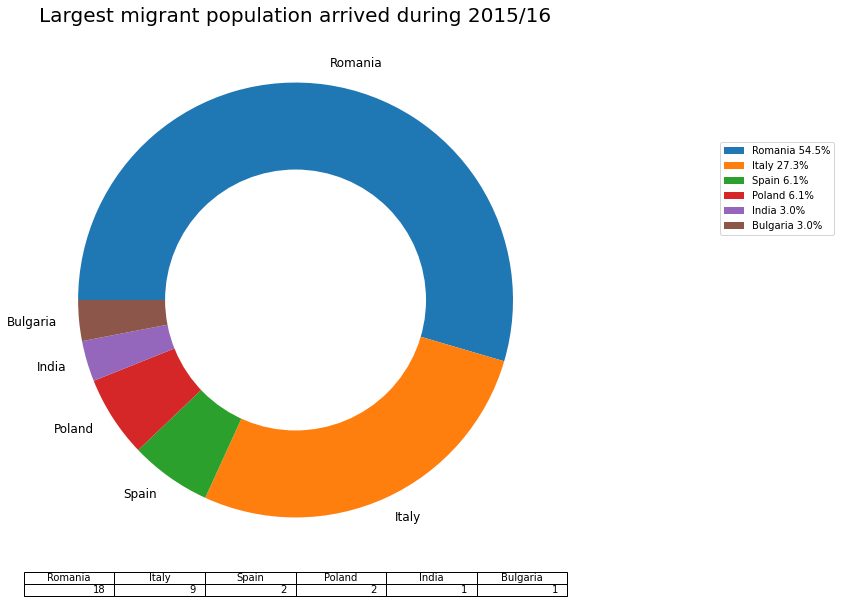

In [6]:
migrants_arrived = dfdemo['Largest_migrant_population_arrived'].value_counts()
migrants_arrived.plot.pie(
                        startangle=180,
                        counterclock=False,
                        label='',table=True,
                        figsize=(20,10),
                        fontsize= 12)

circle = plt.Circle(xy=(0,0), radius=0.6, facecolor='white')
plt.gca().add_artist(circle)

plt.legend(labels=[f'{index} {np.round(value/sum(migrants_arrived)*100,1)}%' for index,value in migrants_arrived.iteritems()], 
           bbox_to_anchor=(1.5,0.8)
          )

plt.title('Largest migrant population arrived during 2015/16', fontsize= 20)

plt.show()

## Bar Graph

#### Bar Graph showing the percentage of population from Black, Asian and minority ethnic groups in different boroughs in the UK

In [7]:
df2 = pd.read_csv('london-borough-profiles.csv', 
                    encoding= 'unicode_escape',
                    usecols=[1,21],
                    skiprows=[0,34,35,36,37,38],
                    names = ['Area_Name','%_of_population_from_BAME_groups']);
df2 = df2.fillna('')

df2.head(8).append(df2.tail(8))

,Area_Name,%_of_population_from_BAME_groups
0,City of London,27.5
1,Barking and Dagenham,49.5
2,Barnet,38.7
3,Bexley,21.4
4,Brent,64.9
5,Bromley,18.9
6,Camden,34.6
7,Croydon,49.9
25,Redbridge,62.7
26,Richmond upon Thames,15.7


In [8]:
df2['Area_Name'] = df2['Area_Name'].astype('category')
df2.dtypes

Area_Name                           category
%_of_population_from_BAME_groups     float64
dtype: object

In [9]:
df2.Area_Name.dtype

CategoricalDtype(categories=['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent',
                  'Bromley', 'Camden', 'City of London', 'Croydon', 'Ealing',
                  'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham',
                  'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow',
                  'Islington', 'Kensington and Chelsea',
                  'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton',
                  'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
                  'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
                  'Westminster'],
                 ordered=False)

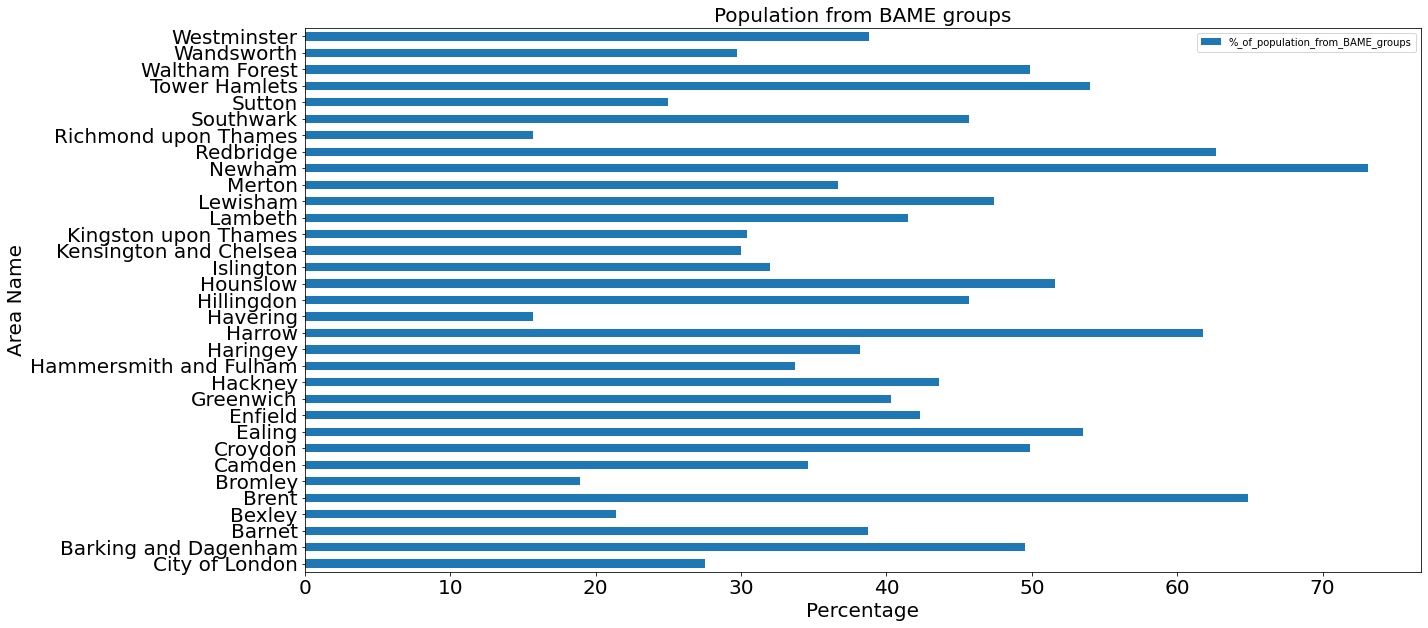

In [23]:
#plotting bar graph horizontally 
df2.plot.barh(x = 'Area_Name', y = '%_of_population_from_BAME_groups', figsize=(20,10), fontsize= 20)
plt.ylabel('Area Name', fontsize= 20)
plt.xlabel('Percentage', fontsize= 20)
plt.title('Population from BAME groups', fontsize= 20)
plt.show()

## Multi Line Graph

#### Multi Line Graph showing the relationship between Black, Asian and minority ethnic and the percentage of people aged 3+ whose main language is not english.

In [11]:
df4 = pd.read_csv('london-borough-profiles.csv', 
                    encoding= 'unicode_escape',
                    usecols=[1,21, 22],
                    skiprows=[0,34,35,36,37,38],
                    names = ['Area_Name','%_of_population_from_BAME_groups_(2016)','%_people_aged_3+_whose_main_language_is_not_English']);
df4 = df4.fillna('')

df4.head(8).append(df4.tail(8))

,Area_Name,%_of_population_from_BAME_groups_(2016),%_people_aged_3+_whose_main_language_is_not_English
0,City of London,27.5,17.1
1,Barking and Dagenham,49.5,18.7
2,Barnet,38.7,23.4
3,Bexley,21.4,6.0
4,Brent,64.9,37.2
5,Bromley,18.9,5.8
6,Camden,34.6,23.5
7,Croydon,49.9,14.5
25,Redbridge,62.7,24.6
26,Richmond upon Thames,15.7,10.4


In [12]:
df4.dtypes

Area_Name                                               object
%_of_population_from_BAME_groups_(2016)                float64
%_people_aged_3+_whose_main_language_is_not_English    float64
dtype: object

In [13]:
df4['Area_Name'] = df4['Area_Name'].astype('category')
df4.dtypes

Area_Name                                              category
%_of_population_from_BAME_groups_(2016)                 float64
%_people_aged_3+_whose_main_language_is_not_English     float64
dtype: object

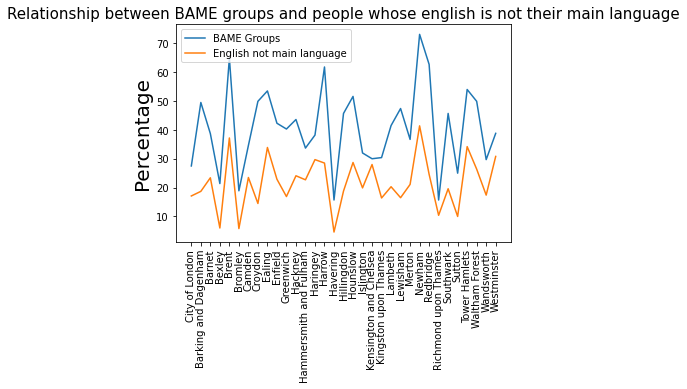

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df4['Area_Name'], df4['%_of_population_from_BAME_groups_(2016)'], label="BAME Groups")
ax.plot(df4['Area_Name'], df4['%_people_aged_3+_whose_main_language_is_not_English'], label="English not main language")
plt.ylabel('Percentage', fontsize= 20)
plt.title('Relationship between BAME groups and people whose english is not their main language', fontsize= 15)
plt.legend(loc = 'upper left')
plt.xticks(rotation=90, fontsize= 10)
plt.show()

## Heatmap

#### Heat map showing the most popular migrant population by country of birth in the UK

In [15]:
df5 = pd.read_csv('london-borough-profiles.csv', 
                    encoding= 'unicode_escape',
                    usecols=[15, 17, 19],
                    skiprows=[0,34,35,36,37,38],
                    names = ['First_largest', 'Second_largest', 'Third_largest']);
df5 = df5.fillna('')

df5.head().append(df5.tail())

,First_largest,Second_largest,Third_largest
0,United States,France,Australia
1,Nigeria,India,Pakistan
2,India,Poland,Iran
3,Nigeria,India,Ireland
4,India,Poland,Ireland
28,Sri Lanka,India,Ireland
29,Bangladesh,India,China
30,Pakistan,Poland,Romania
31,Poland,South Africa,Ireland
32,United States,France,Iraq


In [16]:
df5['First_largest'] = df5['First_largest'].astype('category')
df5['Second_largest'] = df5['Second_largest'].astype('category')
df5['Third_largest'] = df5['Third_largest'].astype('category')

df5.dtypes

First_largest     category
Second_largest    category
Third_largest     category
dtype: object

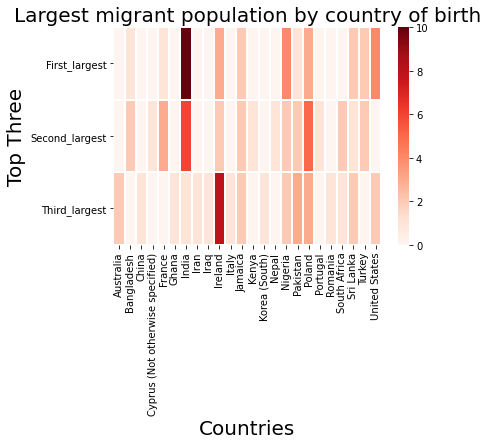

In [17]:
melted = df5.melt(var_name='countries', value_name='topthree', ignore_index=False)
ct = pd.crosstab(index=melted['countries'], columns=melted['topthree'])

sns.heatmap(ct, cmap="Reds", fmt=".2f", linewidth=1)

plt.title('Largest migrant population by country of birth', fontsize = 20)
plt.xlabel('Countries', fontsize = 20)
plt.ylabel('Top Three', fontsize = 20)
plt.show()

## Word Cloud

#### Word Cloud displaying countries of the largest migrant population by country of birth, the more populated, the larger the word.

In [18]:
df6 = pd.read_csv('london-borough-profiles.csv', encoding= 'unicode_escape', usecols=[15,17,19])

df6 = df6.fillna('')
df6.head().append(df6.tail())

,Largest_migrant_population_by_country_of_birth_(2011),Second_largest_migrant_population_by_country_of_birth_(2011),Third_largest_migrant_population_by_country_of_birth_(2011)
0,United States,France,Australia
1,Nigeria,India,Pakistan
2,India,Poland,Iran
3,Nigeria,India,Ireland
4,India,Poland,Ireland
33,Bangladesh,India,Ireland
34,India,Poland,Pakistan
35,India,Poland,Ireland
36,India,Poland,Pakistan
37,.,.,.


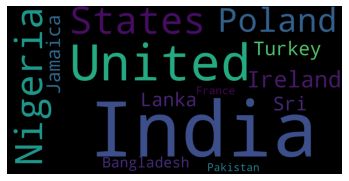

In [19]:
wordcloud = WordCloud (background_color = 'black',
                       width = 1536,
                       height = 768).generate(' '.join(df6['Largest_migrant_population_by_country_of_birth_(2011)']))

plt.imshow(wordcloud) # shows the image
plt.axis('off')
plt.show()

## Cat Plot Diagram

#### Cat plot showing the correlation between boroughs that are in inner and outer london and working age population that are claiming benefits.

In [20]:
df7 = pd.read_csv('london-borough-profiles.csv', 
                    encoding= 'unicode_escape',
                    usecols=[2,34],
                    skiprows=[0,1,34,35,36,37,38],
                    names = ['Inner_Outer_London','Working_age_population_claiming_benefits_%']);
df7 = df7.fillna('')

df7.head().append(df7.tail())

,Inner_Outer_London,Working_age_population_claiming_benefits_%
0,Outer London,10.5
1,Outer London,6.2
2,Outer London,6.8
3,Outer London,8.3
4,Outer London,6.0
27,Outer London,5.1
28,Inner London,8.5
29,Outer London,8.1
30,Inner London,5.9
31,Inner London,7.6


In [21]:
df7['Inner_Outer_London'] = df7['Inner_Outer_London'].astype('category')
df7.dtypes

Inner_Outer_London                            category
Working_age_population_claiming_benefits_%     float64
dtype: object

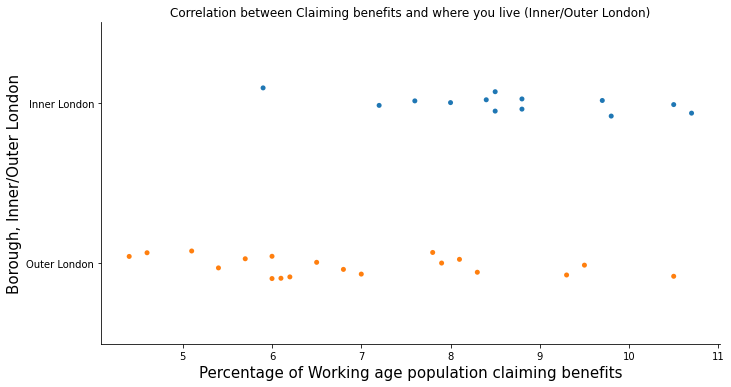

In [22]:
median_Benefits = df7.groupby('Inner_Outer_London').median().sort_values(by='Working_age_population_claiming_benefits_%', ascending=False)
sns.catplot(x='Working_age_population_claiming_benefits_%', y='Inner_Outer_London', data=df7, order=median_Benefits.index, height=5, aspect=2)
plt.title('Correlation between Claiming benefits and where you live (Inner/Outer London)')
plt.ylabel('Borough, Inner/Outer London', fontsize = 15)
plt.xlabel('Percentage of Working age population claiming benefits',  fontsize = 15)
plt.show()